# Modify `alldata` file

Notebook to modify `alldata` with updated grids

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

Duplicate `alldata`

In [2]:
%%bash

mv alldata alldata_orig

# combine/replace columns in alldata

Read in original `alldata`

In [3]:
alldata = pd.read_csv('alldata_orig', sep=' ', header=None, 
                      names=['lon', 'lat', 'sedimentation_rate', 'sediment_thickness', 
                             'agegrid','PCB_mean_dist','river_mouth: amazon','river_mouth: congo',
                             'river_mouth: ganges','river_mouth: godavari','river_mouth: Indus',
                             'river_mouth: magdalena','river_mouth: mahanadi','river_mouth: mississippi',
                             'river_mouth: narmada','river_mouth: niger','river_mouth: orinoco',
                             'river_mouth: paleo-congo','river_mouth: parana'])

In [4]:
alldata.head()

,lon,lat,sedimentation_rate,sediment_thickness,agegrid,PCB_mean_dist,river_mouth: amazon,river_mouth: congo,river_mouth: ganges,river_mouth: godavari,river_mouth: Indus,river_mouth: magdalena,river_mouth: mahanadi,river_mouth: mississippi,river_mouth: narmada,river_mouth: niger,river_mouth: orinoco,river_mouth: paleo-congo,river_mouth: parana
0,1.0,78.0,8.071589,1334.0,28.191975,97.935242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,78.0,5.673732,906.0,27.539858,118.301689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,78.0,5.124500,644.0,26.965570,133.396530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,78.0,4.944192,400.0,26.511002,147.487061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,78.0,4.710172,347.0,26.216475,155.382843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Read in new grids (agegrid, sediment thickness grid, average sedimentation rate grid)

In [5]:
age = xr.open_dataset('agegrid_1d.nc')

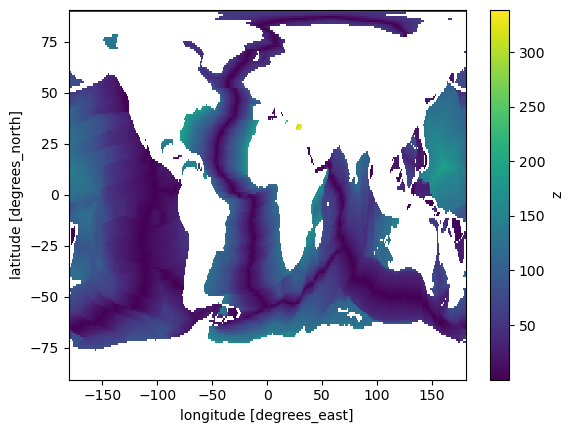

In [6]:
age.z.plot()

read in other files

In [7]:
sedthick = xr.open_dataset('sedgrid_1d.nc')

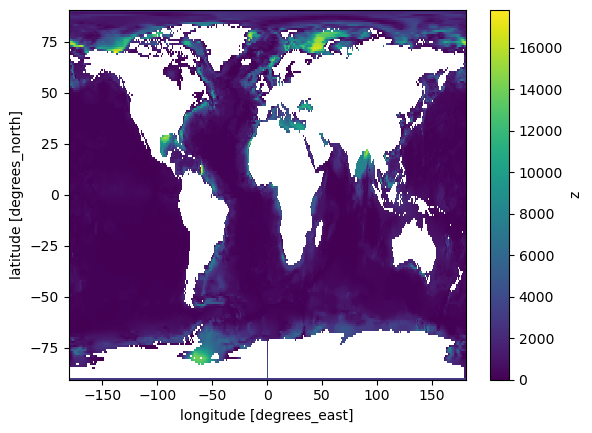

In [8]:
sedthick.z.plot()

In [9]:
sedrate = xr.open_dataset('average_sedimentation_rate_1d.nc')

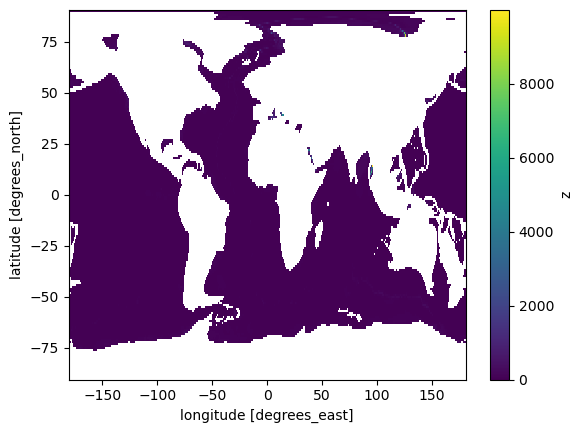

In [10]:
sedrate.z.plot()

## merge new grids

In [11]:
ds = age

In [12]:
ds['age'] = ds.z

In [13]:
ds = ds.drop('z')
ds

<xarray.Dataset>
Dimensions:  (lon: 361, lat: 181)
Coordinates:
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    age      (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.7
    title:        
    history:      gmt grdsample /Users/nickywright/Data/Age/Muller2019-Young2...
    description:  
    GMT_version:  6.4.0

In [14]:
ds['sedthick'] = sedthick.z
ds['sedrate'] = sedrate.z

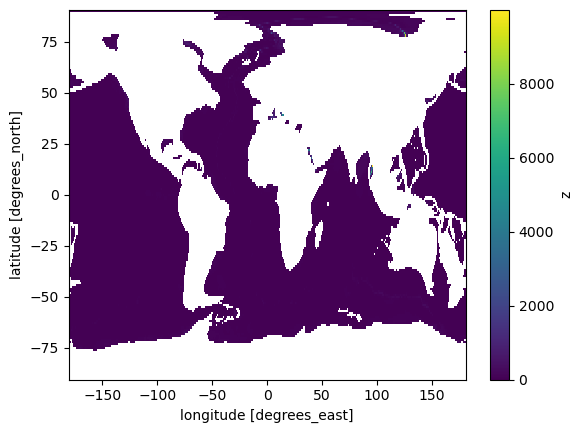

In [15]:
ds.sedrate.plot()

## Convert to pandas dataframe

In [16]:
ds_pandas = ds.to_dataframe()
ds_pandas.head()

age     sedthick  sedrate
lon    lat                             
-180.0 -90.0  NaN  3101.953613      NaN
       -89.0  NaN  1238.305664      NaN
       -88.0  NaN  1227.375732      NaN
       -87.0  NaN  1202.646484      NaN
       -86.0  NaN  1160.923584      NaN

In [17]:
ds_pandas = ds_pandas.reset_index()
ds_pandas.head()

,lon,lat,age,sedthick,sedrate
0,-180.0,-90.0,NaN,3101.953613,NaN
1,-180.0,-89.0,NaN,1238.305664,NaN
2,-180.0,-88.0,NaN,1227.375732,NaN
3,-180.0,-87.0,NaN,1202.646484,NaN
4,-180.0,-86.0,NaN,1160.923584,NaN


## Merge new dataframe with original dataframe

Based on lon/lat

In [18]:
alldata

,lon,lat,sedimentation_rate,sediment_thickness,agegrid,PCB_mean_dist,river_mouth: amazon,river_mouth: congo,river_mouth: ganges,river_mouth: godavari,river_mouth: Indus,river_mouth: magdalena,river_mouth: mahanadi,river_mouth: mississippi,river_mouth: narmada,river_mouth: niger,river_mouth: orinoco,river_mouth: paleo-congo,river_mouth: parana
0,1.0,78.0,8.071589,1334.0,28.191975,97.935242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,78.0,5.673732,906.0,27.539858,118.301689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,78.0,5.124500,644.0,26.965570,133.396530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,78.0,4.944192,400.0,26.511002,147.487061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,78.0,4.710172,347.0,26.216475,155.382843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760,176.0,-70.0,2.813005,855.0,41.293800,242.069855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29761,177.0,-70.0,2.887158,942.0,45.167206,270.204376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29762,178.0,-70.0,3.554454,1184.0,48.368786,297.957489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29763,179.0,-70.0,4.277493,1455.0,NaN,326.830109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
alldata_new = pd.merge(ds_pandas, alldata, how='left', left_on=['lon', 'lat'], right_on = ['lon', 'lat'])

In [20]:
alldata_new.head()

,lon,lat,age,sedthick,sedrate,sedimentation_rate,sediment_thickness,agegrid,PCB_mean_dist,river_mouth: amazon,...,river_mouth: godavari,river_mouth: Indus,river_mouth: magdalena,river_mouth: mahanadi,river_mouth: mississippi,river_mouth: narmada,river_mouth: niger,river_mouth: orinoco,river_mouth: paleo-congo,river_mouth: parana
0,-180.0,-90.0,NaN,3101.953613,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-180.0,-89.0,NaN,1238.305664,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-180.0,-88.0,NaN,1227.375732,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-180.0,-87.0,NaN,1202.646484,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-180.0,-86.0,NaN,1160.923584,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check columns

In [21]:
alldata_new.columns

Index(['lon', 'lat', 'age', 'sedthick', 'sedrate', 'sedimentation_rate',
       'sediment_thickness', 'agegrid', 'PCB_mean_dist', 'river_mouth: amazon',
       'river_mouth: congo', 'river_mouth: ganges', 'river_mouth: godavari',
       'river_mouth: Indus', 'river_mouth: magdalena', 'river_mouth: mahanadi',
       'river_mouth: mississippi', 'river_mouth: narmada',
       'river_mouth: niger', 'river_mouth: orinoco',
       'river_mouth: paleo-congo', 'river_mouth: parana'],
      dtype='object')

In [22]:
# delete old columns
del alldata_new['sedimentation_rate']
del alldata_new['sediment_thickness']
del alldata_new['agegrid']

In [23]:
alldata_new.head()

,lon,lat,age,sedthick,sedrate,PCB_mean_dist,river_mouth: amazon,river_mouth: congo,river_mouth: ganges,river_mouth: godavari,river_mouth: Indus,river_mouth: magdalena,river_mouth: mahanadi,river_mouth: mississippi,river_mouth: narmada,river_mouth: niger,river_mouth: orinoco,river_mouth: paleo-congo,river_mouth: parana
0,-180.0,-90.0,NaN,3101.953613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-180.0,-89.0,NaN,1238.305664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-180.0,-88.0,NaN,1227.375732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-180.0,-87.0,NaN,1202.646484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-180.0,-86.0,NaN,1160.923584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## reorder columns and save

In [57]:
alldata_new_reordered = alldata_new.reindex(columns=['lon', 'lat', 'sedrate', 'sedthick', 'age',
                                                     'PCB_mean_dist', 'river_mouth: amazon', 'river_mouth: congo',
                                                     'river_mouth: ganges', 'river_mouth: godavari', 'river_mouth: Indus',
                                                     'river_mouth: magdalena', 'river_mouth: mahanadi', 'river_mouth: mississippi',
                                                     'river_mouth: narmada', 'river_mouth: niger', 'river_mouth: orinoco',
                                                     'river_mouth: paleo-congo', 'river_mouth: parana'])

In [58]:
# save
alldata_new_reordered.to_csv('alldata', na_rep='NaN', sep='\t', header=False, index=False)

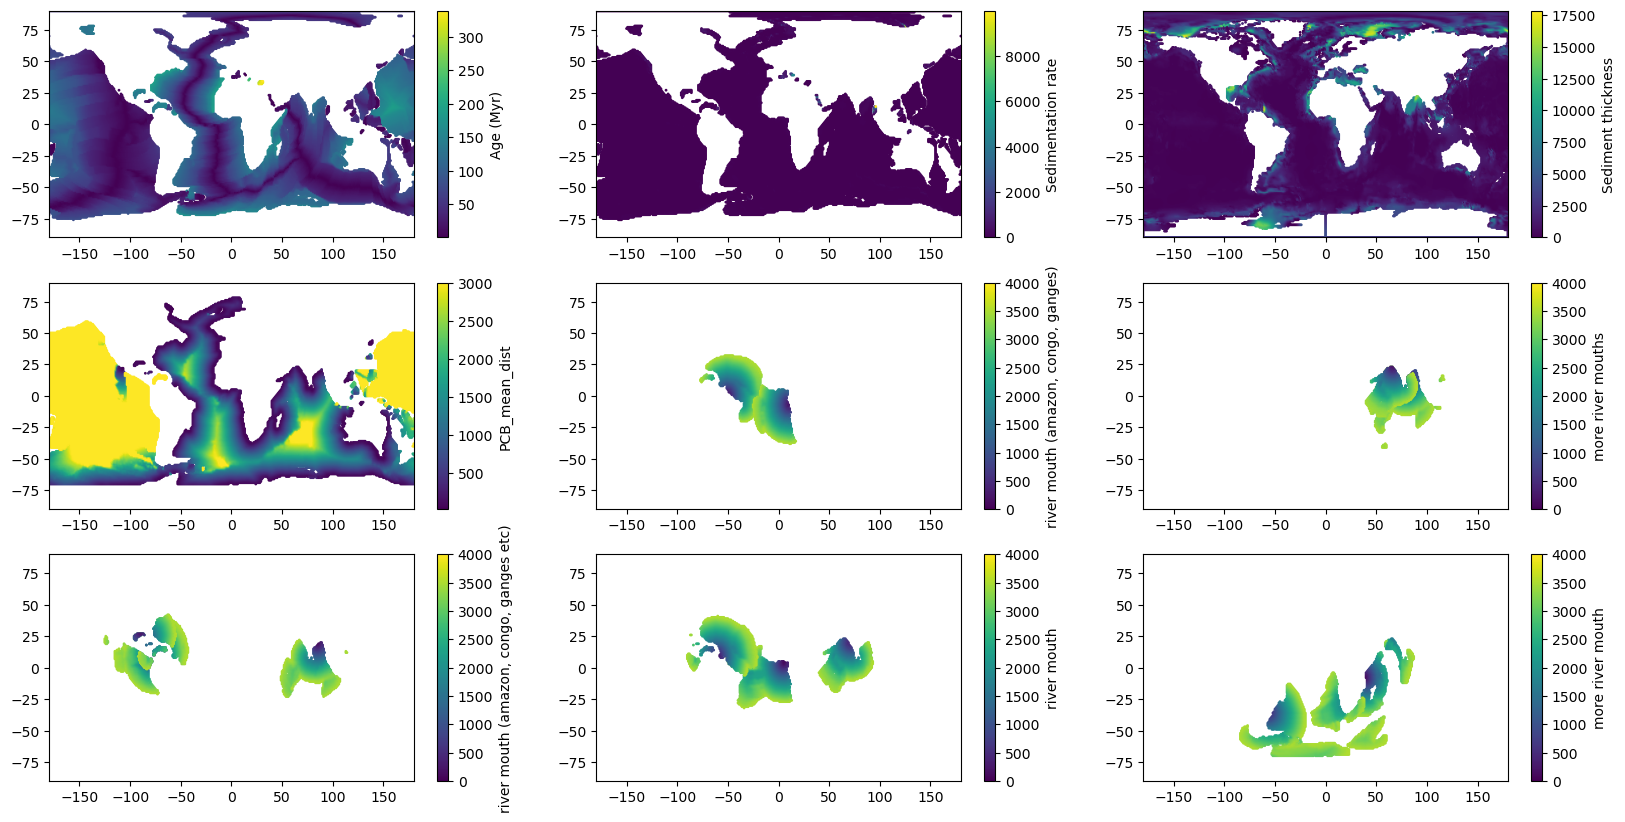

In [80]:
## fig

fig, ax = plt.subplots(3, 3, figsize=(20, 10))

age = ax[0, 0].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered.age, s=1)
ax[0, 0].set_xlim(-180, 180)
ax[0, 0].set_ylim(-90, 90)
plt.colorbar(age, label='Age (Myr)', ax=ax[0, 0])

rate = ax[0,1].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered.sedrate, s=1)
ax[0, 1].set_xlim(-180, 180)
ax[0, 1].set_ylim(-90, 90)
plt.colorbar(rate, label='Sedimentation rate', ax=ax[0, 1])

thick = ax[0,2].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered.sedthick, s=1)
ax[0, 2].set_xlim(-180, 180)
ax[0, 2].set_ylim(-90, 90)
plt.colorbar(thick, label='Sediment thickness', ax=ax[0, 2])

# ----
c = ax[1, 0].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered.PCB_mean_dist, s=1)
ax[1, 0].set_xlim(-180, 180)
ax[1, 0].set_ylim(-90, 90)
plt.colorbar(c, label='PCB_mean_dist', ax=ax[1,0])

ax[1, 1].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: amazon'], s=1, vmin=0, vmax=4000)
c = ax[1, 1].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: congo'], s=1, vmin=0, vmax=4000)
ax[1, 1].set_xlim(-180, 180)
ax[1, 1].set_ylim(-90, 90)
plt.colorbar(c, label='river mouth (amazon, congo, ganges)', ax=ax[1, 1])


# 
ax[1, 2].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: ganges'], s=1, vmin=0, vmax=4000)
ax[1, 2].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: godavari'], s=1, vmin=0, vmax=4000)
c = ax[1, 2].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: Indus'], s=1, vmin=0, vmax=4000)
ax[1, 2].set_xlim(-180, 180)
ax[1, 2].set_ylim(-90, 90)
plt.colorbar(c, label='more river mouths', ax=ax[1, 2])

 #
ax[2, 0].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: magdalena'], s=1, vmin=0, vmax=4000)
ax[2, 0].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: mahanadi'], s=1, vmin=0, vmax=4000)
ax[2, 0].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: mississippi'], s=1, vmin=0, vmax=4000)
ax[2, 0].set_xlim(-180, 180)
ax[2, 0].set_ylim(-90, 90)
plt.colorbar(c, label='river mouth (amazon, congo, ganges etc)', ax=ax[2, 0])

# 
ax[2, 1].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: narmada'], s=1, vmin=0, vmax=4000)
ax[2, 1].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: niger'], s=1, vmin=0, vmax=4000)
ax[2, 1].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: orinoco'], s=1, vmin=0, vmax=4000)
ax[2, 1].set_xlim(-180, 180)
ax[2, 1].set_ylim(-90, 90)
plt.colorbar(c, label='river mouth', ax=ax[2, 1])


c = ax[2, 2].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: paleo-congo'], s=1, vmin=0, vmax=4000)
c = ax[2, 2].scatter(alldata_new_reordered.lon, alldata_new_reordered.lat, c=alldata_new_reordered['river_mouth: parana'], s=1, vmin=0, vmax=4000)
ax[2, 2].set_xlim(-180, 180)
ax[2, 2].set_ylim(-90, 90)
plt.colorbar(c, label='more river mouth', ax=ax[2, 2])


plt.show()